<a href="https://colab.research.google.com/github/davanstrien/image-search/blob/davanstrien-patch-1/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets sentence-transformers

     |████████████████████████████████| 325 kB 5.5 MB/s 
     |████████████████████████████████| 79 kB 5.4 MB/s 
     |████████████████████████████████| 136 kB 10.5 MB/s 
     |████████████████████████████████| 77 kB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 48.2 MB/s 
     |████████████████████████████████| 212 kB 25.2 MB/s 
     |████████████████████████████████| 127 kB 2.0 MB/s 
     |████████████████████████████████| 4.0 MB 41.8 MB/s 
     |████████████████████████████████| 1.2 MB 49.9 MB/s 
     |████████████████████████████████| 895 kB 51.8 MB/s 
     |████████████████████████████████| 6.6 MB 40.4 MB/s 
     |████████████████████████████████| 596 kB 50.8 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 271 kB 40.7 MB/s 
     |████████████████████████████████| 144 kB 69.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=93e6ffeabf8c9d7e43b5cb

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
from PIL import Image
import requests
import io
import torch

In [ ]:
en_model = SentenceTransformer('clip-ViT-B-32')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


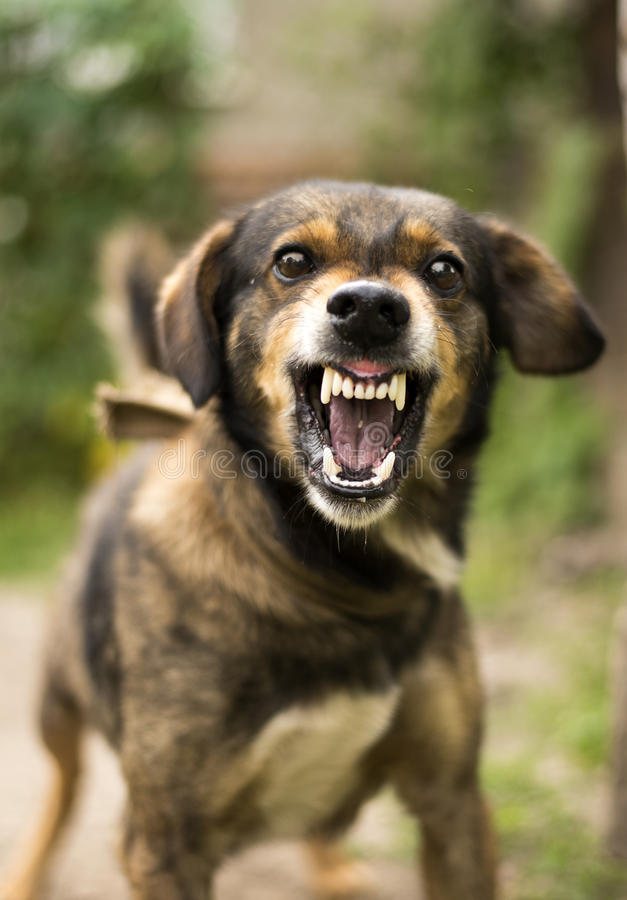

In [ ]:
r =  requests.get("https://thumbs.dreamstime.com/b/aggressive-angry-dog-enraged-grin-jaws-fangs-hungry-drool-73287985.jpg")
im = Image.open(io.BytesIO(r.content))
im

In [ ]:
im_enc = en_model.encode(im)

In [ ]:
labels = ["angry dog", "happy dog"]

In [ ]:
label_enc = en_model.encode(labels)

In [ ]:
label_enc

array([[-0.05409747,  0.06876521, -0.3389034 , ..., -0.23637   ,
         0.389951  , -0.10231467],
       [ 0.0153406 ,  0.13979217, -0.6065521 , ..., -0.36559993,
        -0.07439303, -0.04235359]], dtype=float32)

In [ ]:
cos_scores = util.cos_sim(im_enc, label_enc)


In [ ]:
pred_labels = torch.argmax(cos_scores, dim=1)


In [ ]:
labels[pred_labels]

'angry dog'